# Python for Data Science

> This page is a Jupyter Notebook that can be [found and downloaded at the GitHub repository](https://github.com/trchudley/geospatial-python-durham/blob/main/website/02_using/02_data_analysis.ipynb).

## Using Python packages to create and plot data

Now that we understand the basics, we can begin to use the files we have installed. In the installation section, I only provided three packages to install (`rioxarray`, `geopandas`, and `matplotlib`). However, the dependencies of these package further included a number of other key packages that we will be using. 

Perhaps the most foundational package for doing science in python is called `numpy`. `numpy` provides you a more feature-compete range of maths capability than `math` alone. Most importantly, it uses its own data type, called a `numpy` array, which is the foundational data type of nearly everything else we will be doing.

In [1]:
import numpy as np

`numpy` can imported just like `math` - however, it is common to rename it to `np`, as we will be using it so much we want to save our keyboard!

Here are some simple tasks we can do:

In [ ]:

# Create a numpy array that ranges between 0 and 2pi, with 100 elements
x = np.linspace(0, 2*np.pi, 100)

# Show between the 10th and 20th element
print('Sample x:', x[10:20])

# Calculate the sine of each element
sinx = np.sin(x)

# Show between the 10th and 20th element
print('Sample sin(x):', sinx[10:20])

# Calculate the cosine of each element
cosx = np.cos(x)


Sample x: [0.63466518 0.6981317  0.76159822 0.82506474 0.88853126 0.95199777
 1.01546429 1.07893081 1.14239733 1.20586385]
Sample sin(x): [0.59290793 0.64278761 0.69007901 0.73459171 0.77614646 0.81457595
 0.84972543 0.88145336 0.909632   0.93414786]


Again, I am not going to go into detail here - hopefully you can interpret what is happening, and have the ability to google further to find more examples!

We can also plot this data. The go-to for producing data for general uses is called `matplotlib`, the 'matlab plotting library' (because it originally aimed to emulate MATLAB plotting). Here is a quick example of the sort of thing you can do:

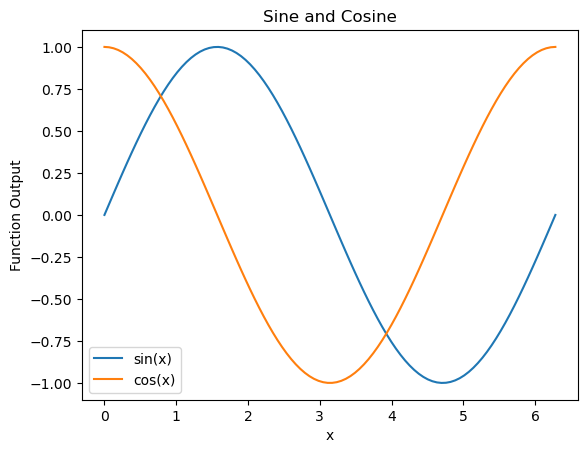

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, sinx, color='tab:blue', label='sin(x)')
ax.plot(x, cosx, color='tab:orange', label='cos(x)')

ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('Function Output')

ax.set_title('Sine and Cosine')

plt.show()

Note that numpy can produce n-dimensional data (1-D, 2-D, 3-D, $n$-d...). We can also plot it. Hopefully we can start to see how this might be useful for geospatial data...

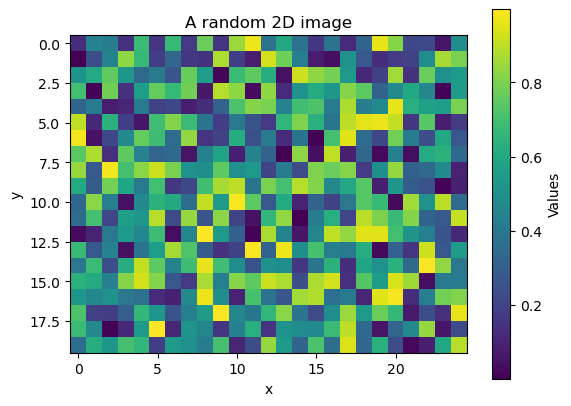

In [ ]:

# Produce 500 random numbers between 0 and 1, arranged into a 2D grid of 
# 20 rows and 25 columns
z = np.random.rand(500).reshape((20,25))

fig, ax = plt.subplots()

im = ax.imshow(z)
plt.colorbar(im, ax=ax, label='Values')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('A random 2D image')

plt.show()

## Python packages to load tabular files

Okay, so we can generate random data and do some things to it. So what?

To begin to load and manipulate actual data, we need another package - something that kind of works like Microsoft Excel, maybe? Our solution here is `pandas`.

In [58]:
import pandas as pd

df = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv', comment = "#")

Here, we have read the [Mauna Loa monthly mean CO2 record .csv file](https://gml.noaa.gov/ccgg/trends/data.html) using the handy `read_csv` function of pandas. Due to the awkard fact that this csv file has a load of comment lines (beginning with `#`), I had to specify to pandas using the `comment` parameter to ignore these lines. However, this isn't a normal thing to do - normally just feeding the filepath of a csv (be it local or online) is enough to make things work!

We have called our variable `df`, standing for 'dataframe', which is what pandas calls its data type. We can see what it looks like by just calling the `df` variable:

In [59]:
df

year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0    1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1    1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2    1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3    1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4    1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99
..    ...    ...           ...      ...             ...    ...   ...   ...
805  2025      4     2025.2917   429.64          427.13     23  0.73  0.29
806  2025      5     2025.3750   430.51          427.26     23  0.39  0.16
807  2025      6     2025.4583   429.61          427.16     26  0.71  0.27
808  2025      7     2025.5417   427.87          427.45     24  0.31  0.12
809  2025      8     2025.6250   425.48          427.36     24  0.36  0.14

[810 rows x 8 columns]

Looks neat. Now we can also plot this data! We can call individual columns in a way similar to dictionaries - e.g. `df['average']` to get the 'average' column.

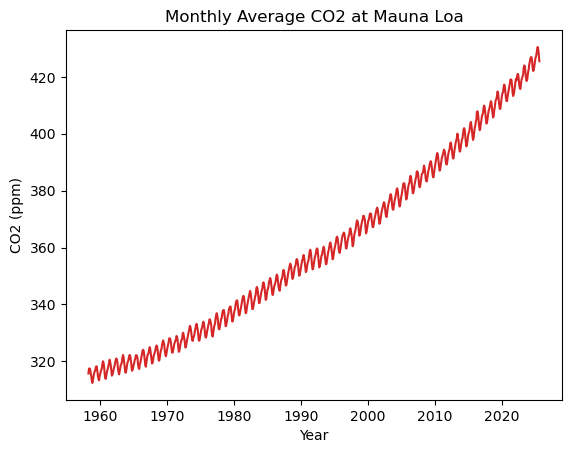

In [89]:
fig, ax = plt.subplots()

ax.plot(df['decimal date'], df['average'], color='tab:red', label='Average CO2')

ax.set_xlabel('Year')
ax.set_ylabel('CO2 (ppm)')

ax.set_title('Monthly Average CO2 at Mauna Loa')

plt.show()

We can also do additional things with our data for processing. We could do this using maths functions (including functionality provided by `numpy`) to create new columns:

In [67]:
# convert average ppm to average ppb
df['average_ppb'] = df['average'] / 1000

Or we can take advantage of pandas functinality to do more advanced stuff based around the context of the columns (e.g. annual averages, smoothing). Pandas is quite good at time-series stuff in particular - it was originally designed for economic trend analysis.

In [73]:
# generate a 'datetime' column from the year and month columns
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

# Calculate a rolling 12-month mean, centred on the current month
df['average_smoothed'] = df['average'].rolling(window=12, center=True).mean()

Note one thing we do here is turn our `year` and `month` columns, which are currently just `int` (integer) data, into a `datetime` datatype using the `pd.to_datetime()` function. `datetime` objects can be a little finnicky in Python, but Pandas makes it somewhat easy to manage this kind of data.

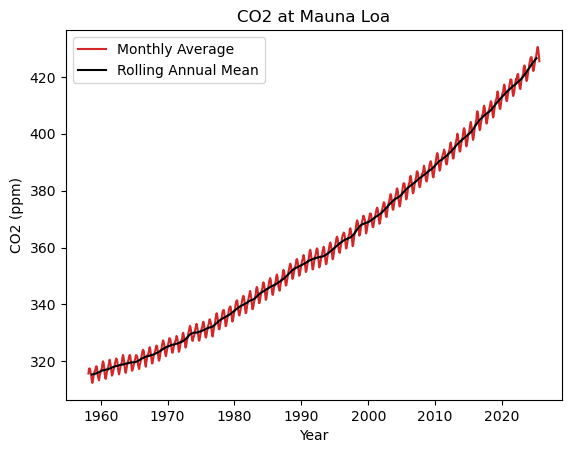

In [76]:
# plot
fig, ax = plt.subplots()

ax.plot(df['datetime'], df['average'], color='tab:red', label='Monthly Average')
ax.plot(df['datetime'], df['average_smoothed'], color='k', label='Rolling Annual Mean')

ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('CO2 (ppm)')

ax.set_title('CO2 at Mauna Loa')

plt.show()

## Working with Files

Once you have generated your data, we can re-export it to a file, so that we can use it in other scripts. 

Nearly all the common (geospatial) data science packages we will be using have the ability to read and write files, but it's worth highlighting two Standard Library tools that are valuable for interaction with your file system: `os` and `glob`.

`os` (standing for Operating System, of course), provides various miscellaneous functionality that approximate what you can do in the command line - for instance, `os.pwd()` to print your current directory, `os.path.exists('path/to/file.txt')` to check if a given filepath exists, or `os.path.basename('path/to/file.txt')` to strip the filepath of everything but the basename (i.e. returning `file.txt` in this example). We can also create directories:

In [ ]:
# Make a directory called sample_data, if it doesn't already exist
if not os.path.exists("sample_data"):
    os.mkdir("sample_data")

I will show you the functionality of `glob` later in this notebook.

Nearly all tools today will have their own simple way of exporting data. For pandas dataframes, it is as follows:

In [ ]:
df.to_csv("../sample_data/mauna_loa_co2.csv")

Now lets set up some more data to show how we can build on this to iterate through large amounts of files.

In the below cell, I do a few things using tools you have seen so far. I first check to see if a directory called `sample_input` exists in the directory `sample_data`. If it doesn't exist (`if not os.path.exists(dir_path)`), I create it (`os.mkdir(dir_path`)). I then loop through a range of years 2020-2025, generating a pandas dataframe that contains two columns: the first all the dates in the year, and the second a series of random values (using `numpy`). 

This is necessary just to generate what I want to show you next, but it's worth showing just how simple it is! If you go to the `./sample_data/sample_input` directory in this repository, you can see that they have been created.

In [ ]:
import os

# Define directory path
dir_path = "./sample_data/sample_input"

# Create directory if it doesn't exist
if not os.path.exists(dir_path):

    # Make directory
    os.mkdir(dir_path)

    # Generate random data for CSV files 2020-2025
    for year in range(2020, 2026):
        dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")[:365]
        values = np.random.rand(len(dates)) * 100  # random values
        df = pd.DataFrame({"date": dates, "values": values})
        file_path = os.path.join(dir_path, f"data_{year}.csv")
        df.to_csv(file_path, index=False)


Anyway, the important thing is to imagine not that we have just created this data, but that we have a directory full of tens or hundreds of iteratively named data files (kind of like what we have with our `data_2020.csv` through `data_2025.csv` files). How can we begin to interact with these programatically?

One key was is using the `glob` standard library. `glob` allows us to search our file system for standardise file names using pattern matching. Below, we construct a `glob` search for files in the format `"./sample_data/sample_input/data_*.csv"`, where `*` just means "fill in the blanks". It returns a list of files that match, which we print. See that we get a list of all the matching files in the folder!

In [ ]:
import glob

# Find all csv files
csv_files = glob.glob("../sample_data/sample_input/data_*.csv"))

for f in csv_files:
    print(f)

./sample_data/sample_input/data_2021.csv
./sample_data/sample_input/data_2020.csv
./sample_data/sample_input/data_2022.csv
./sample_data/sample_input/data_2023.csv
./sample_data/sample_input/data_2024.csv
./sample_data/sample_input/data_2025.csv


Now, we have the ability to use our existing tools - such as looping and functions - to open these data sequentially and do interesting things with them. For now, we will just plot these on the same plot. However, imagine you had 1000 files that needed some slightly more complex processing applied. You could (with the help of internet searching and LLMs) loop through all 1000 files, apply the processing to each one, and export them under new standard naems to a new location. Hopefully this begins to show just how powerful programming can be...

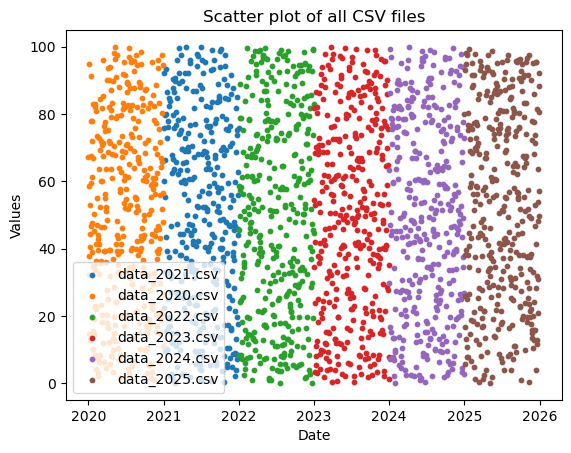

In [86]:

fig, ax = plt.subplots()

for file in csv_files:
    df = pd.read_csv(file, parse_dates=["date"])
    ax.scatter(df["date"], df["values"], s=10, label=os.path.basename(file))

ax.set_title("Scatter plot of all CSV files")
ax.set_xlabel("Date")
ax.set_ylabel("Values")
ax.legend()

plt.show()